# one-good-chart

In this notebook, you will place one good ggplot chart!


## Standard Python + R setup and imports

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports
require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [33]:
%%R

library(jpeg)
library(png)
library(grid)


## The Data

Most of the data cleaning should already be done elsewhere, so this section should have much more than loading a CSV (ideally in long format). The goal is to cleanly display the data for presentation. 

In [13]:
# 👉 python code to read dataframe and display it below

df = pd.read_csv('hog.csv')
df

,year,no_of_operations,heads_per_farm,us_inventory_in_thousands
0,1997,126000,490,61000
1,2002,79000,780,60000
2,2007,75000,900,68000
3,2012,64000,1040,66000
4,2017,66000,1090,72000


# The Context

Write a few sentences explaining the context of the story or the data that this chart comes from. 

The data is from here - https://www.ers.usda.gov/webdocs/publications/104437/err-308.pdf?v=7069.8
We were asked to remake a chart for one of the Data Studio assignments and I decided to do it using ggplot. I re-did (to some extent) the same homework.

# The Chart

Read the dataframe in R and plot using ggplot

In [14]:
%%R 

df <- read_csv('hog.csv')
df


Rows: 5 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): year, no_of_operations, heads_per_farm, us_inventory_in_thousands

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 5 × 4
   year no_of_operations heads_per_farm us_inventory_in_thousands
  <dbl>            <dbl>          <dbl>                     <dbl>
1  1997           126000            490                     61000
2  2002            79000            780                     60000
3  2007            75000            900                     68000
4  2012            64000           1040                     66000
5  2017            66000           1090                     72000


In [40]:
%%R

img <- readPNG("pig.png")

In [41]:
%%R

img_dims <- dim(img)

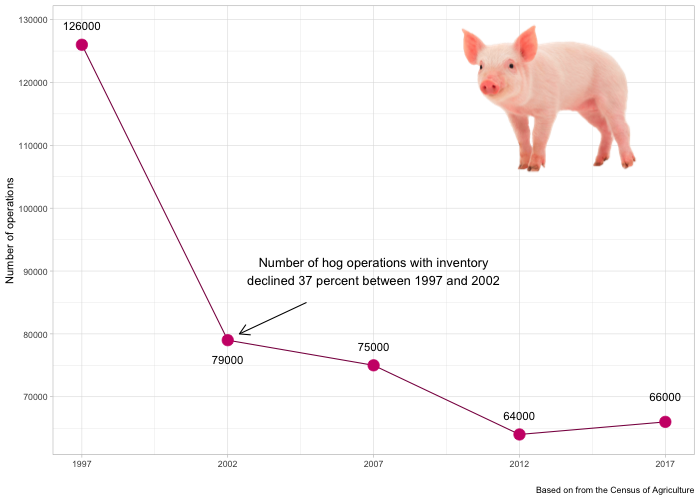

In [123]:
%%R -h 500 -w 700

ggplot(df) +
annotation_custom(rasterGrob(img, interpolate = TRUE), 
                    xmin = 2010, xmax = 2016,
                    ymin = 105000, ymax = 129900) +
aes(x = year, y = no_of_operations) +
geom_line(stat = 'identity', color="deeppink4") +
geom_point(shape=21, color="deeppink3", fill="deeppink3", size=5) +
scale_x_continuous(breaks = sort(unique(df$year))) +
scale_y_continuous(breaks = seq(0, 130000, 10000)) +
annotate("text", x = 1997, y = 129000, label = "126000", size = 4, color='black') +
annotate("text", x = 2002, y = 76000, label = "79000", size = 4, color='black') +
annotate("text", x = 2007, y = 78000, label = "75000", size = 4, color='black') +
annotate("text", x = 2012, y = 67000, label = "64000", size = 4, color='black') +
annotate("text", x = 2017, y = 70000, label = "66000", size = 4, color='black') +
annotate("segment", x=2004.7, xend=2002.4, y=85000, yend=80000,size=0.5,color='black',arrow=arrow(length=unit(0.4,"cm"))) +
annotate("text", x=2007, y=90000, label="Number of hog operations with inventory\ndeclined 37 percent between 1997 and 2002", size=4.5, color='black') +
labs(x = "",
    y = "Number of operations",
    caption = "Based on from the Census of Agriculture") +
theme_light() 

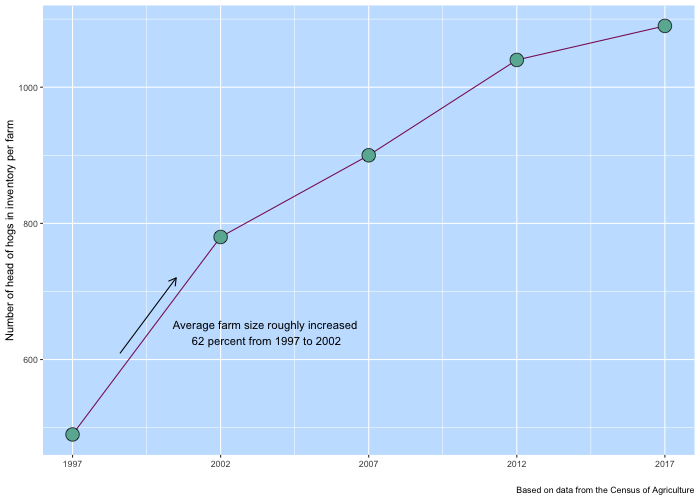

In [124]:
%%R -h 500 -w 700

ggplot(df) +
aes(x = year, y = heads_per_farm) +
geom_line(stat = 'identity', color="maroon4") +
geom_point(shape=21, color="black", fill="#69b3a2", size=6) +
scale_x_continuous(breaks = sort(unique(df$year))) +
scale_y_continuous(breaks = seq(0, 1100, 200)) +
annotate("segment", x=1998.6, xend=2000.5, y=609, yend=720,size=0.5,arrow=arrow(length=unit(0.3,"cm"))) +
annotate("text", x = 2003.5, y = 640, label = "Average farm size roughly increased\n 62 percent from 1997 to 2002", size = 4, color='black') +
labs(x = "",
    y = "Number of head of hogs in inventory per farm",
    caption = "Based on data from the Census of Agriculture") +
theme(panel.background = element_rect(fill = "slategray1"))

The charts would be designed the same if this were to be published. I did both differently to just try things I hadn't done before. I haven't added a title and subtitle because the charts, if they were to be published, would be placed side-by-side and the title and subtitle would be added to the html. 

Possible title - *Number of U.S. hog operations declined by 47% between 1997 and 2017 even as the farm size doubled*